Ось **розгорнутий контент для файлу `07_projects.ipynb`**, який містить **реальні аналітичні задачі для закріплення знань** у сфері **інформаційно-аналітичного забезпечення військових штабів** з використанням Python.

---

# 📘 `07_projects.ipynb`

## **Тема: Приклади аналітичних завдань і мініпроєктів**

---

### 🔹 Вступ

У цьому файлі подано серію прикладних завдань і мініпроєктів, які дозволяють практично застосувати здобуті знання Python, Pandas, Matplotlib та файлових операцій у реальних умовах роботи військових аналітиків.

---
Проєкт 1: Аналіз оперативної обстановки на основі CSV

### 🔹 Вхідні дані:

`losses.csv` — файл зі щоденними втратами:

```csv
Дата,Напрямок,Втрати,Підрозділ
2025-06-10,Схід,102,1-а мехбр
2025-06-11,Схід,134,1-а мехбр
2025-06-12,Південь,98,2-а танкбр
...
```

### 🔹 Завдання:

1. Визначити сумарні втрати по кожному напрямку.
2. Побудувати графік динаміки втрат.
3. Виділити найнебезпечніші напрямки за останні 3 дні.
4. Експортувати аналіз у файл `summary.csv`.
## 🔸 ✅ 

---

## 🔸 ✅ Проєкт 2: Побудова ситуаційного графіка

### 🔹 Завдання:

1. Завантажити бойові донесення (`reports.txt`).
2. Витягти дати, напрямки, втрати за допомогою простого парсингу.
3. Побудувати графік змін бойової ситуації.
4. Вивести повідомлення, якщо втрати на одному напрямку перевищують 150 осіб.

---

## 🔸 ✅ Проєкт 3: Генерація аналітичної довідки

### 🔹 Вихід:

* Автоматичне створення `summary_report.txt` на основі обробленого CSV-файлу з висновками:

#### ▶️ Приклад:

```
✅ Напрямок з найвищими втратами: Схід (580 осіб)
✅ Найбільш залучений підрозділ: 1-а мехбр
✅ Динаміка втрат: зростання протягом 3 останніх днів
✅ Рекомендація: посилити угруповання на східному напрямку
```

---

## 🔸 ✅ Проєкт 4: Система фільтрації бойових подій

### 🔹 Вхідні дані:

* Список подій у форматі JSON або CSV
* Поля: дата, напрям, тип події, втрати, підрозділ

### 🔹 Завдання:

* Створити фільтр подій за напрямком та типом (наступ, артобстріл)
* Порахувати середні втрати по типу подій
* Побудувати порівняльний графік (artillery vs assault)

---

## 🔸 ✅ Проєкт 5 (просунутий): Комбінована панель звітності

1. Завантаження кількох звітів
2. Групування та обчислення статистик
3. Побудова декількох графіків
4. Генерація HTML-звіту або `.docx` через шаблон

---

## 📝 Загальні інструкції до проєктів:

* Рекомендується зберігати всі проєкти в окремих підпапках.
* Вхідні файли повинні бути збережені у форматі `.csv`, `.txt`, `.json`.
* Можна додати інтерфейс командного рядка для зручного запуску аналізу.
* Кожен проєкт має містити:

  * `README.md` (опис цілей)
  * `analyze.py` або `project.ipynb`
  * приклад вихідного звіту

---

### ✅ Порада

Для кожного проєкту бажано створювати структуру:

```
project_folder/
├── data/
├── output/
├── project.ipynb
└── README.md
```



Проєкт 1: Аналіз оперативної обстановки на основі CSV

Сумарні втрати по напрямках:
Напрямок
Західний      860
Південний     780
Північний    1715
Східний       910
Name: Втрати особового складу, dtype: int64


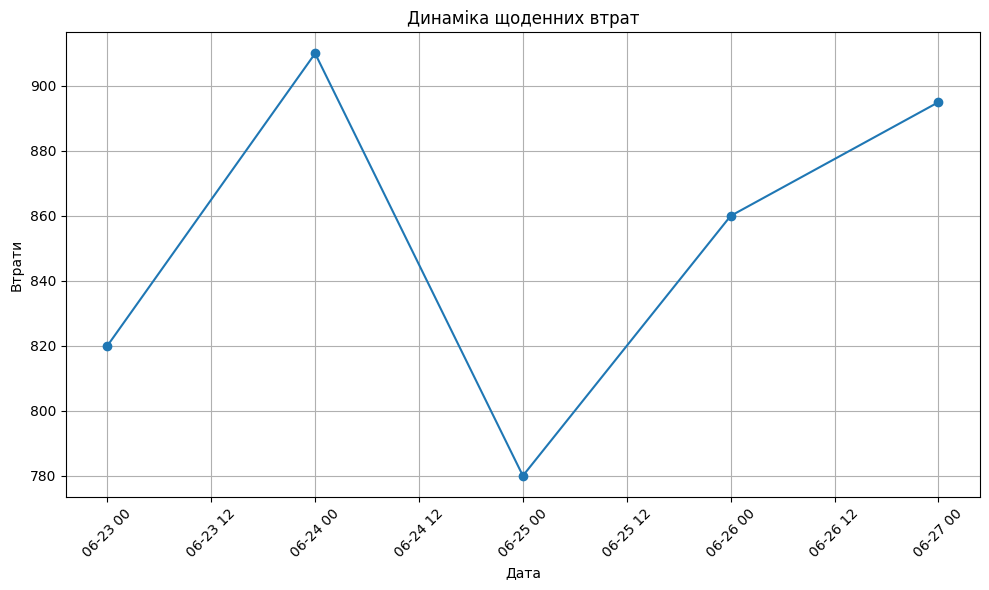


Найнебезпечніші напрямки за останні 3 дні:
Напрямок
Північний    895
Західний     860
Південний    780
Name: Втрати особового складу, dtype: int64

Аналіз збережено у summary.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Читаємо CSV
df = pd.read_csv('losses.csv', parse_dates=['Дата'])

# 1. Сумарні втрати по кожному напрямку
total_losses_by_direction = df.groupby('Напрямок')['Втрати особового складу'].sum()
print("Сумарні втрати по напрямках:")
print(total_losses_by_direction)

# 2. Графік динаміки втрат по днях (агрегація по датах)
daily_losses = df.groupby('Дата')['Втрати особового складу'].sum()
plt.figure(figsize=(10,6))
plt.plot(daily_losses.index, daily_losses.values, marker='o')
plt.title('Динаміка щоденних втрат')
plt.xlabel('Дата')
plt.ylabel('Втрати')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Найнебезпечніші напрямки за останні 3 дні
last_date = df['Дата'].max()
three_days_ago = last_date - pd.Timedelta(days=3)
recent_data = df[df['Дата'] > three_days_ago]
dangerous_directions = recent_data.groupby('Напрямок')['Втрати особового складу'].sum().sort_values(ascending=False)
print("\nНайнебезпечніші напрямки за останні 3 дні:")
print(dangerous_directions)

# 4. Експорт аналізу у summary.csv
summary = pd.DataFrame({
    'Сумарні втрати по напрямках': total_losses_by_direction,
    'Втрати за останні 3 дні': dangerous_directions
}).fillna(0)
summary.to_csv('summary.csv', encoding='utf-8-sig')

print("\nАналіз збережено у summary.csv")


Проєкт 2: Побудова ситуаційного графіка

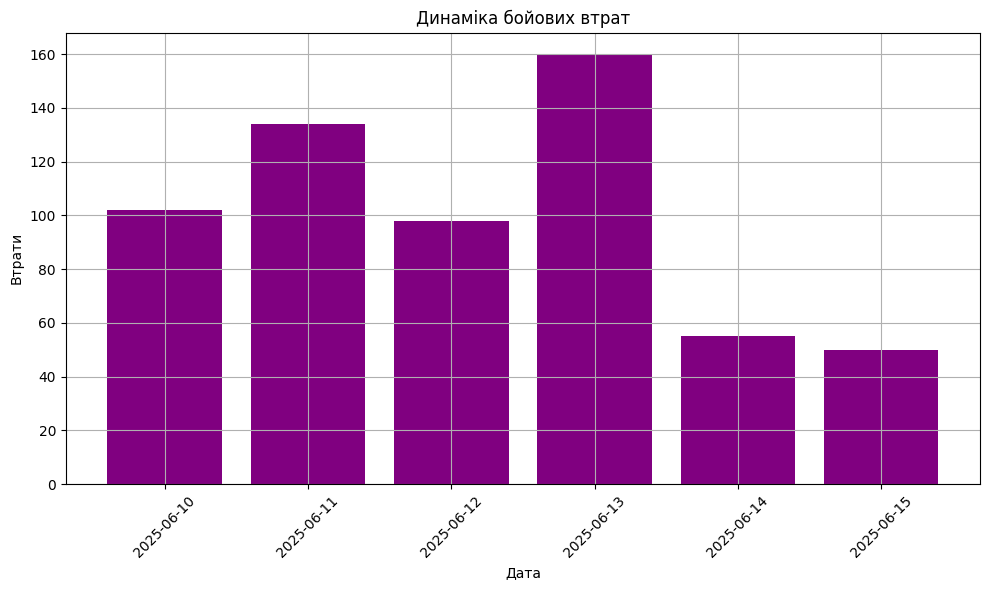

⚠️ Увага! Втрати на напрямку 'Захід' перевищують 150 осіб: 180
⚠️ Увага! Втрати на напрямку 'Південь' перевищують 150 осіб: 153
⚠️ Увага! Втрати на напрямку 'Схід' перевищують 150 осіб: 266


In [8]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1. Завантажуємо бойові донесення з reports.txt
with open('reports.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# 2. Витягуємо дати, напрямки, втрати за допомогою парсингу
pattern = re.compile(r'(\d{4}-\d{2}-\d{2})\s+(\S+)\s+втрати:\s+(\d+)')
data = []

for line in lines:
    match = pattern.search(line)
    if match:
        date_str, direction, losses_str = match.groups()
        data.append({
            'Дата': pd.to_datetime(date_str),
            'Напрямок': direction,
            'Втрати': int(losses_str)
        })

# Створюємо DataFrame
df = pd.DataFrame(data)

if df.empty:
    print("Дані не знайдені. Перевірте формат файлу reports.txt")
    exit()

# 3. Побудова графіка динаміки сумарних втрат по датах
daily_losses = df.groupby('Дата')['Втрати'].sum()

plt.figure(figsize=(10,6))
plt.bar(daily_losses.index, daily_losses.values, color='purple')
plt.title('Динаміка бойових втрат')
plt.xlabel('Дата')
plt.ylabel('Втрати')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Виводимо повідомлення, якщо втрати на напрямку > 150
total_losses_by_direction = df.groupby('Напрямок')['Втрати'].sum()

for direction, losses in total_losses_by_direction.items():
    if losses > 150:
        print(f"⚠️ Увага! Втрати на напрямку '{direction}' перевищують 150 осіб: {losses}")


Проєкт 3: Генерація аналітичної довідки

In [10]:
import pandas as pd

# Завантаження CSV
df = pd.read_csv('losses.csv', parse_dates=['Дата'])

# 1. Напрямок з найвищими втратами
losses_by_direction = df.groupby('Напрямок')['Втрати особового складу'].sum()
max_direction = losses_by_direction.idxmax()
max_direction_losses = losses_by_direction.max()

# 2. Найбільш залучений підрозділ (сумарні втрати за підрозділами)
losses_by_unit = df.groupby('Підрозділ')['Втрати особового складу'].sum()
max_unit = losses_by_unit.idxmax()

# 3. Динаміка втрат за останні 3 дні
last_3_days = df['Дата'].sort_values().unique()[-3:]
df_last3 = df[df['Дата'].isin(last_3_days)]

daily_losses_last3 = df_last3.groupby('Дата')['Втрати особового складу'].sum().sort_index()

# Перевірка тренду: чи зростають втрати за 3 дні поспіль
losses_values = daily_losses_last3.values
if len(losses_values) == 3 and losses_values[0] < losses_values[1] < losses_values[2]:
    trend = "зростання протягом 3 останніх днів"
else:
    trend = "тренд втрат не є чітко зростаючим за останні 3 дні"

# 4. Рекомендація — приклад
recommendation = f"посилити угруповання на {max_direction.lower()} напрямку"

# Формуємо текст звіту
report_lines = [
    f"✅ Напрямок з найвищими втратами: {max_direction} ({max_direction_losses} осіб)",
    f"✅ Найбільш залучений підрозділ: {max_unit}",
    f"✅ Динаміка втрат: {trend}",
    f"✅ Рекомендація: {recommendation}"
]

# Запис у файл
with open('summary_report.txt', 'w', encoding='utf-8') as f:
    for line in report_lines:
        f.write(line + '\n')

print("Аналітична довідка створена у файлі summary_report.txt")


Аналітична довідка створена у файлі summary_report.txt
